## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





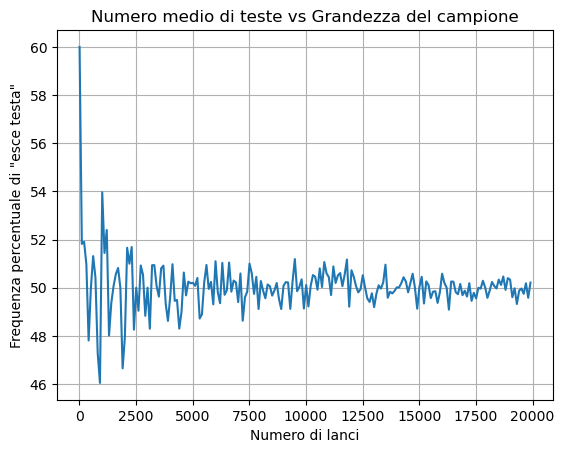

In [5]:
from typing import Sequence
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import seaborn as sns

def freq_heads(n):
    #restituisce la frequenza percentuale di volte in cui e' uscita testa
    lanci = [np.random.randint(0, 2) for i in range(n)]
    tot_testa = sum(lanci)
    return ((tot_testa / n) * 100)

totali = range(10, 20000, 100)

lanci = [freq_heads(i) for i in range(10, 20000, 100)]

df = pd.DataFrame({
    'freq_teste': lanci,
    'num_lanci': totali
})

plt.plot(df.num_lanci, df.freq_teste)
plt.xlabel('Numero di lanci')
plt.ylabel('Frequenza percentuale di "esce testa"')
plt.title('Numero medio di teste vs Grandezza del campione')
plt.grid(True)
plt.show()

## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

In [2]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Dimensioni del dataframe: (891, 12)
Numero di NA per la colonna PassengerId: 0

Numero di NA per la colonna Survived: 0

Numero di NA per la colonna Pclass: 0

Numero di NA per la colonna Name: 0

Numero di NA per la colonna Sex: 0

Numero di NA per la colonna Age: 177

Numero di NA per la colonna SibSp: 0

Numero di NA per la colonna Parch: 0

Numero di NA per la colonna Ticket: 0

Numero di NA per la colonna Fare: 0

Numero di NA per la colonna Cabin: 687

Numero di NA per la colonna Embarked: 2

Numero di righe duplicate: 0


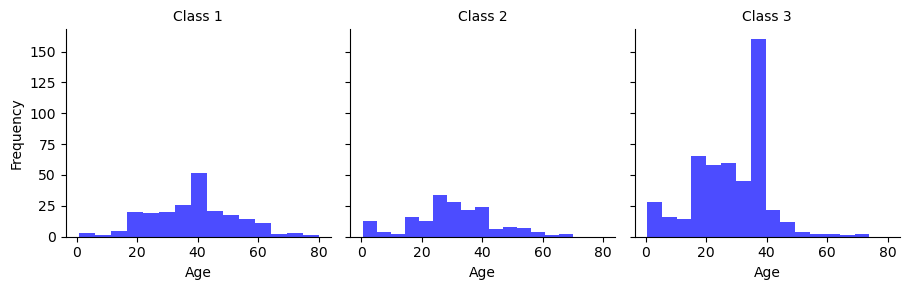

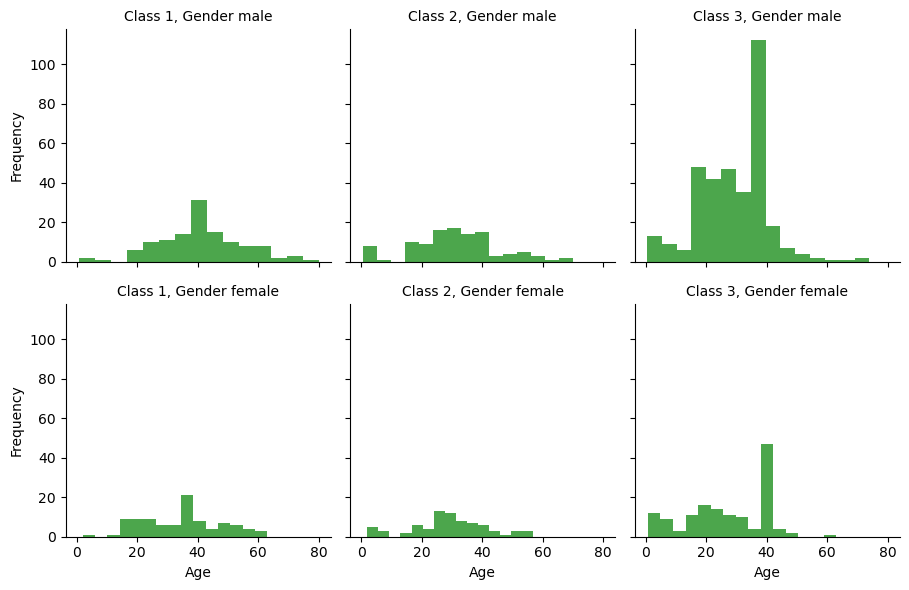

In [3]:

from numpy import dtype


print("Dimensioni del dataframe: {}".format(df.shape))
for col in df.columns:
    print("Numero di NA per la colonna {}: {}\n".format(col, df[col].isna().sum()))

moda_embarked = df['Embarked'].mode()
df['Embarked'] = df['Embarked'].fillna(moda_embarked)

df['Age'].dropna(inplace = True)

print("Numero di righe duplicate: {}".format(df.duplicated().sum()))

media_per_classe = df.groupby('Pclass')['Age'].mean()

for i, (media) in enumerate(media_per_classe):
    df['Age'] = df['Age'].fillna(media)

g = sns.FacetGrid(df, col="Pclass")
g.map(plt.hist, "Age", bins=15, color="blue", alpha=0.7)

g.set_axis_labels("Age", "Frequency")
g.set_titles("Class {col_name}")

plt.show()

g = sns.FacetGrid(df, row="Sex", col="Pclass")
g.map(plt.hist, "Age", bins=15, color="green", alpha=0.7)

g.set_axis_labels("Age", "Frequency")
g.set_titles("Class {col_name}, Gender {row_name}")

plt.show()

## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


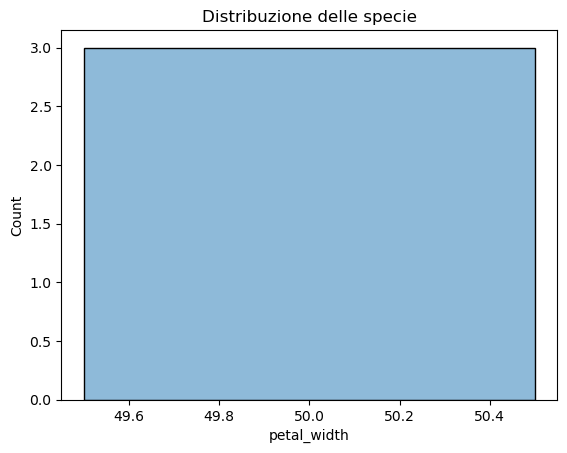

Lunghezza media dei petali per specie: species
setosa        1.462
versicolor    4.260
virginica     5.552
Name: petal_length, dtype: float64

Larghezza media dei petali per specie: species
setosa        0.246
versicolor    1.326
virginica     2.026
Name: petal_width, dtype: float64



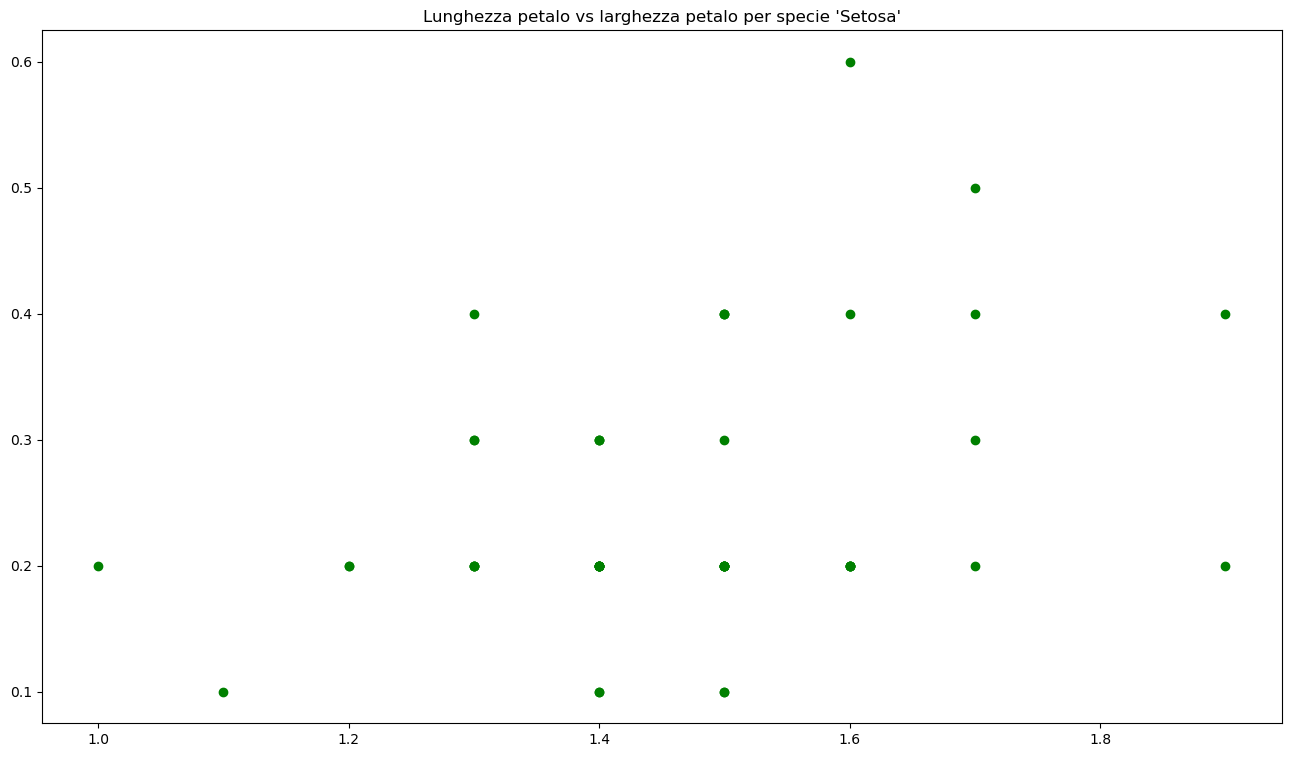

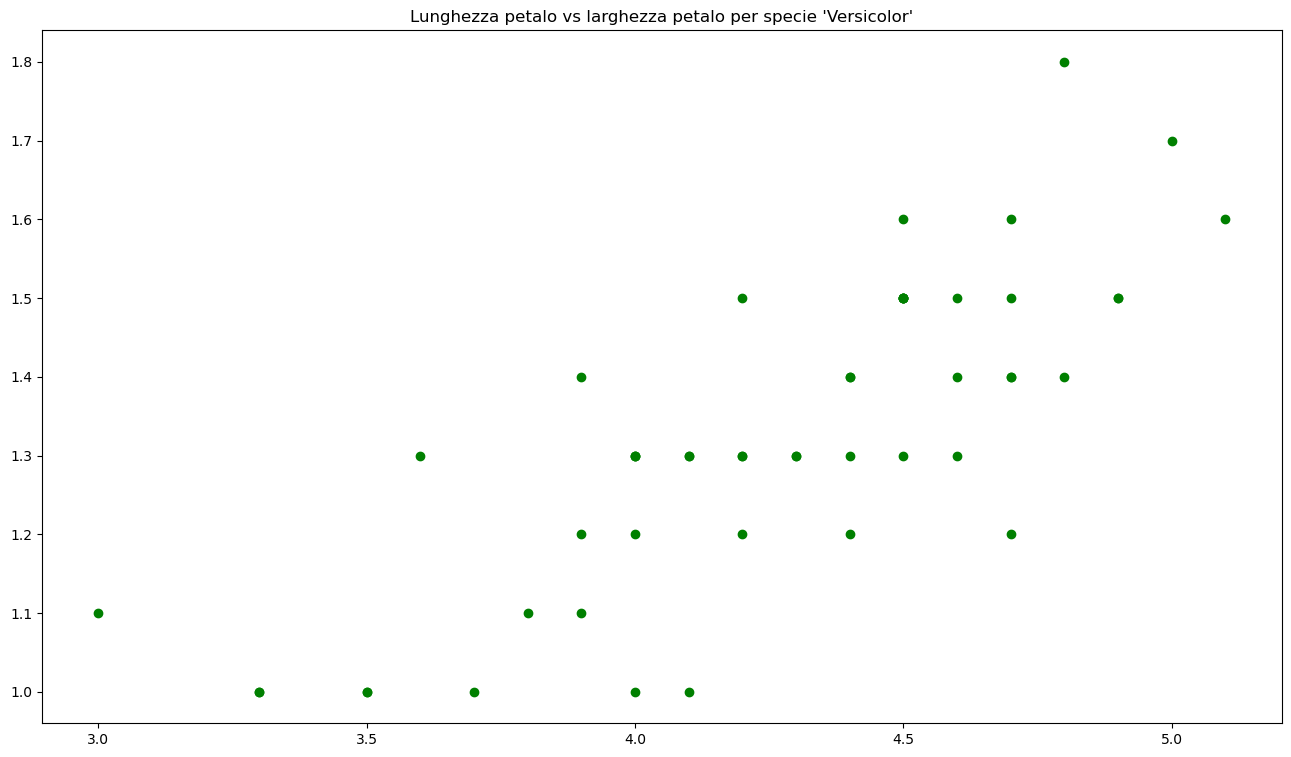

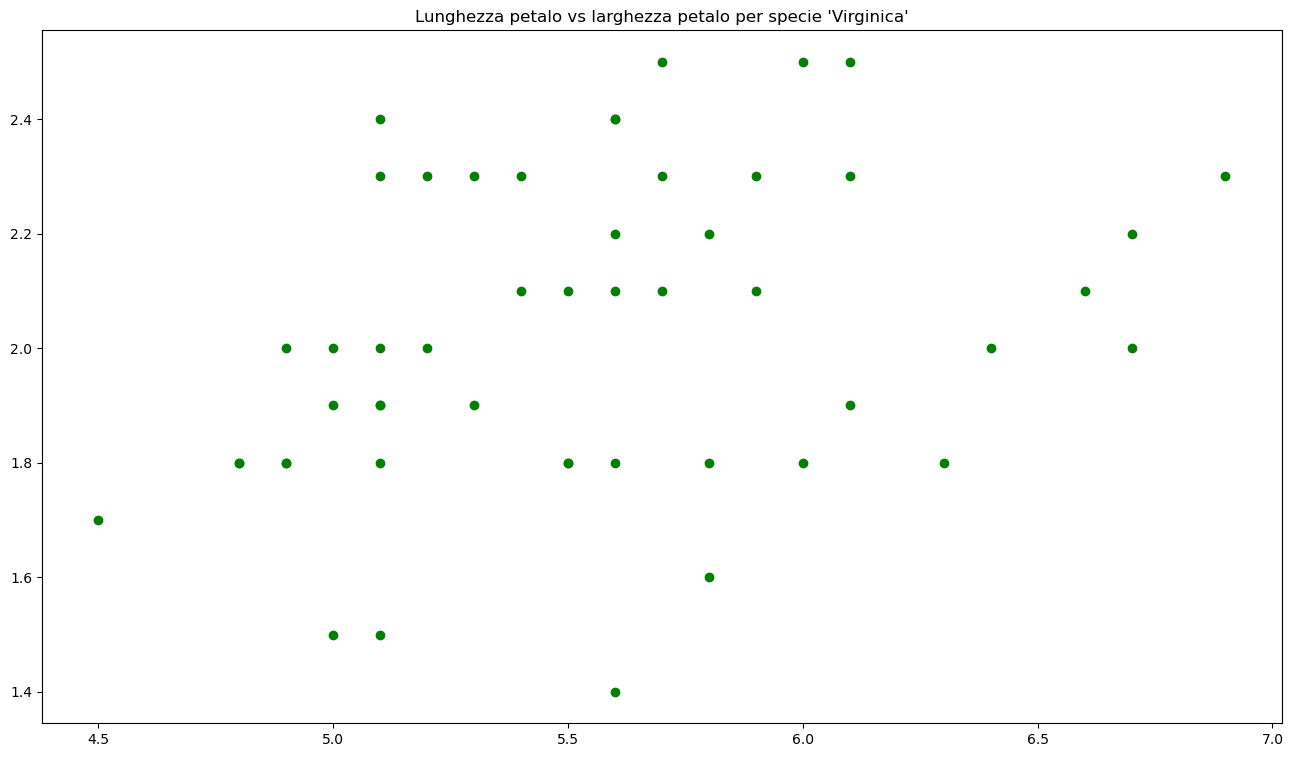

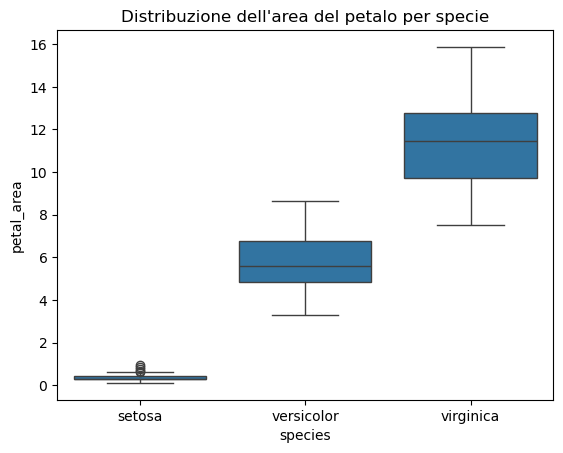

In [62]:
distr = df.groupby('species')['petal_width'].count()
sns.histplot(data=distr, kde=True)
plt.title("Distribuzione delle specie")
plt.show()

print("Lunghezza media dei petali per specie: {}\n".format(df.groupby('species')['petal_length'].mean()))
print("Larghezza media dei petali per specie: {}\n".format(df.groupby('species')['petal_width'].mean()))

plt.figure(figsize=(16, 9))
plt.scatter(df[df['species'] == 'setosa']['petal_length'], df[df['species'] == 'setosa']['petal_width'], color='green')
plt.title("Lunghezza petalo vs larghezza petalo per specie 'Setosa'")
plt.show()

plt.figure(figsize=(16, 9))
plt.scatter(df[df['species'] == 'versicolor']['petal_length'], df[df['species'] == 'versicolor']['petal_width'], color='green')
plt.title("Lunghezza petalo vs larghezza petalo per specie 'Versicolor'")
plt.show()

plt.figure(figsize=(16, 9))
plt.scatter(df[df['species'] == 'virginica']['petal_length'], df[df['species'] == 'virginica']['petal_width'], color='green')
plt.title("Lunghezza petalo vs larghezza petalo per specie 'Virginica'")
plt.show()

df['petal_area'] = df['petal_length'] * df['petal_width']
df['petal_area'].head()

sns.boxplot(data=df, x='species', y='petal_area')
plt.title("Distribuzione dell'area del petalo per specie")
plt.show()